In [50]:
!where self_nucleation.csv

C:\Users\20224751\Downloads\Simona test_\self_nucleation.csv


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\20224751\Downloads\Simona test_\self_nucleation.csv'

df = pd.read_csv(file_path)

print(df.to_string()) 

    time       DH
0       1  0.3560
1       2  0.7890
2       3  0.9849
3       4  1.1000
4       5  1.3920
5       6  1.4020
6       7  1.4500
7       8  1.5500
8       9  1.7800
9      10  1.9000
10     20  2.0100
11     30  2.1100
12     40  2.1100
13     50  2.1100
14     60  2.1100
15     70  2.1100
16     80  2.1100
17     90  2.1100
18    100  2.1100


col.strip() is used to remove leading and trailing whitespaces from each element (or string) in a column (or Series) named col

In [52]:
import numpy as np

data = np.array([
    [5, 0.4924],
    [7, 0.7988],
    [10, 1.542],
    [15, 2.732],
    [20, 3.59],
    [25, 4.267],
    [30, 4.672],
    [40, 5.357],
    [50, 5.686],
    [60, 6.002],
    [70, 6.192]])

print(data)

[[ 5.      0.4924]
 [ 7.      0.7988]
 [10.      1.542 ]
 [15.      2.732 ]
 [20.      3.59  ]
 [25.      4.267 ]
 [30.      4.672 ]
 [40.      5.357 ]
 [50.      5.686 ]
 [60.      6.002 ]
 [70.      6.192 ]]


In [53]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["time", "H1"]
print(df)

    time      H1
0    5.0  0.4924
1    7.0  0.7988
2   10.0  1.5420
3   15.0  2.7320
4   20.0  3.5900
5   25.0  4.2670
6   30.0  4.6720
7   40.0  5.3570
8   50.0  5.6860
9   60.0  6.0020
10  70.0  6.1920


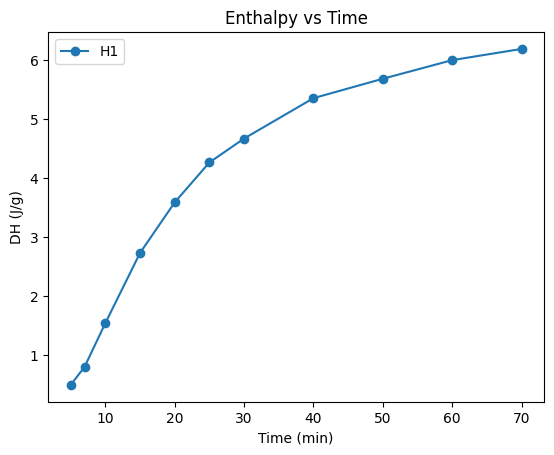

In [54]:
import numpy as np
import matplotlib.pyplot as plt

df.plot(x='time', y='H1', marker='o', linestyle='-')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time')
plt.show()

Provide an initial guess for the parameters (DHinf, k, tzero, and n). This is necessary for the optimization algorithm to start the process. You might base your initial guess on some knowledge of the system or by visually inspecting the data.
Define the Model Function (DH):you start with a model function, in your case, DH(t, DHinf, k, tzero, n).
Collect Experimental Data: you have experimental data, represented by arrays t_data and a_data (a_data=DH)

DH[t_] := DHinf*(1 - Exp[-(k (t - tzero))^n])
4 initial guesses (DHinf, k, t zero, n)

In [67]:
t_data = np.array(df['time'])
a_data = np.array(df['H1'])

# Define the DH function
def DH(t_data, DHinf, k, tzero, n):
    return DHinf * (1 - np.exp(-k * np.abs(t_data - tzero)**n))

In [101]:
from ipywidgets import interact, widgets

@interact(DHinf=widgets.FloatSlider(min=0, max=7, step=0.01, value=3),
          k=widgets.FloatSlider(min=0, max=0.1, step=0.05, value=0.04),
          tzero=widgets.FloatSlider(min=0, max=2, step=0.05, value=0.5),        
          n=widgets.FloatSlider(min=0, max=2, step=0.05, value=0.5))

def plot_h(DHinf, k, tzero, n):
    plt.scatter(t_data, a_data)
    DH_f = DH(t_data, DHinf, k, tzero, n)
    plt.plot(t_data, DH_f, color='red')
    plt.ylim(0, 8)
    plt.xlabel('t')
    plt.ylabel('DH')
    plt.title('Plot of DH Function')
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='DHinf', max=7.0, step=0.01), FloatSlider(value=0.04,…

The curve_fit function adjusts the parameters of your model function to best fit the experimental data. It minimizes the difference between the observed data and the values predicted by the model.

Elements in the diagonal represent the covariance for each parameter. Off-diagonal you have the interactions between parameters (example k and t_zero).

Linear model => slope calculation => kinetic
Log1minXovXmax = {t - tzero1 /. DH.fit, 
   Log[1 - DH/DHinf1 /. DH_fit]} MATHEMATICA CODE 

In [93]:
#Define paramenters

DHinf= 6.241487855992436
k= 0.03719719126995143
tzero= 3.3615543620862147
n= 1.1064417970039309

In [94]:
x = np.abs(t_data - tzero_fit)
y = np.log(1 - a_data / DHinf_fit)

print(x)
print(y)

[ 1.63844564  3.63844564  6.63844564 11.63844564 16.63844564 21.63844564
 26.63844564 36.63844564 46.63844564 56.63844564 66.63844564]
[-0.08217738 -0.13694556 -0.28376506 -0.57574848 -0.85609765 -1.15090954
 -1.38046923 -1.95396509 -2.41912712 -3.26047116 -4.83724657]


plt.scatter(x[:10], y[:10], label='Data') for taking the first part of the curve that does not include the plateau (it would lead to a constant line - try yourself by deleting [:10])
The function LogDH takes as input parameters related to time (t_data) and fitted parameters (DHinf_fit, k_fit, tzero_fit, n_fit). It calculates two arrays, x and y, and returns them.
t_data: Input data related to time.
DHinf_fit, k_fit, tzero_fit, n_fit: Fitted parameters used in the calculations.
Inside the function:

x = (t_data - tzero_fit): Calculates the array x by subtracting tzero_fit from each element of t_data.

y = np.log(1 - a_data / DHinf_fit): Calculates the array y by performing element-wise operations on a_data and DHinf_fit, then taking the natural logarithm (np.log).

return x, y: Returns the arrays x and y as a tuple.

In [95]:
def LogDHn(x, k_lin, n_lin):
    return -k_lin * np.abs(x**n_lin)

In [102]:
@interact(k_lin=widgets.FloatSlider(min=0.01, max=0.1, step=0.01, value=0.05),
          n_lin=widgets.FloatSlider(min=0, max=1, step=0.05, value=0.5))

def plot_hl(k_lin, n_lin):
    plt.scatter(x, y)
    Lin_f = LogDHn(x, k_lin, n_lin)
    plt.plot(x, Lin_f, color='red')
    plt.ylim(-1, 0)
    plt.xlabel('t-tzero')
    plt.ylabel('1-(H1/H0)')
    plt.title('Linear plot of DH Function')
    plt.show()

interactive(children=(FloatSlider(value=0.05, description='k_lin', max=0.1, min=0.01, step=0.01), FloatSlider(…

[-0.0657299   0.22317293]
Linear model parameters k and n

CURVE FITTING - curve_fit scipy

In [45]:
#Fit the function to the data
from scipy.optimize import curve_fit

initial_guess = (0.05,1)

params_new, covariance = curve_fit(LogDHn, x, y, p0=initial_guess)

#Fitted parameters extraction
k_lin_fit, n_lin_fit = params_new

In [46]:
print(k_lin_fit)
print(n_lin_fit)

0.016389721635288505
1.3343313206642544


Text(0.5, 1.0, 'Linear fit')

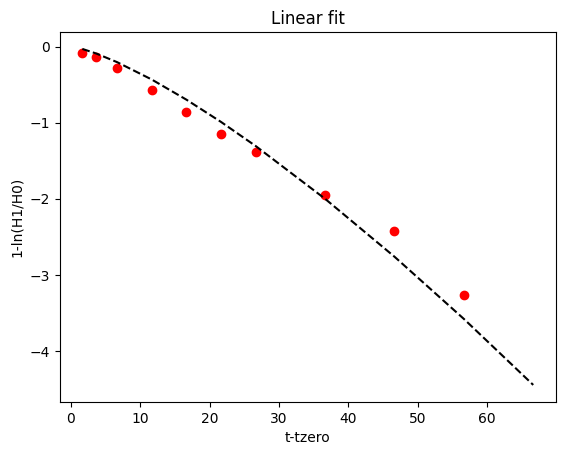

In [47]:
plt.plot(x[:10],y[:10], 'ro', x, LogDHn(x, k_lin_fit, n_lin_fit), '--k') 
plt.xlabel('t-tzero')
plt.ylabel('1-ln(H1/H0)')
plt.title('Linear fit')